# Using Markdown and Julia in Jupyter notebooks
*CHEM-LV03 Analysis and Simulation of Stochastic Reaction-diffusion Systems* <br>



---

A notebook consists of markdown cells and code cells. You can

* select a cell by clicking it once
* see and edit the source code of a cell by double clicking it
* run the selected cell with `shift + Enter`
* click *Help > Keyboard shortcuts* for more helpful commands
* find more detailed Jupyter notebook tutorials [here](https://jupyter-notebook.readthedocs.io/en/stable/index.html) or by searching the internet

When submitting your solution as a Jupyter notebook, always **remember to Kernel > Restart & Run all** and check that the output looks as desired before submitting.

---

## 1. Markdown
The Jupyter notebook has extensive markup capabilities. Here we show some examples. You can use markdown cells to write a complete answer with text and equations. They support Latex syntax for equations inside dollar signs, as in `$a = \sqrt{2}$`.

\begin{equation}
a = \sqrt{2}
\end{equation}

You can go ahead and double click cells below to see their Markdown code.

### 1.2 Matrices

Matrices can be written like here:

$$
\begin{align*}
M &= \begin{bmatrix}
a & b \\
c & d
\end{bmatrix}
&
M^T &= \begin{bmatrix}
a & c \\
b & d
\end{bmatrix}
\end{align*}
$$



### 1.3 Showing intermediate steps
In some exercises you may need to do longer calculations, and should show intermediate steps in your solution. You use `\begin{align*}` like in this example.

**Problem:** Let $X,Y$ be two independent random variables so that $X \sim \text{Exponential}(\lambda_1)$ and $Y \sim \text{Exponential}(\lambda_2)$. Derive the distribution of $Z = \min\{X,Y\}$.

**Solution:**
We know the cumulative density functions of $X$ and $Y$, which are

$$
F_X(x) = 1 - e^{-\lambda_1 x} \hspace{1cm} \text{and} \hspace{1cm} F_Y(y) = 1 - e^{-\lambda_2 y} 
$$

and can compute the cumulative density function of $Z$ as

$$
\begin{align*}
F_Z(z) &= P(Z \leq z)\\ 
  &= 1 - P(Z \geq z) \\
  &= 1 - P(\min\{X,Y\} \geq z) \\
  &= 1 - P(X \geq z \text{ and } Y \geq z)\\
  &= 1 - P(X \geq z) \cdot P(Y \geq z)\\
  &= 1 - (1 - F_X(z)) \cdot (1 - F_Y(z))\\
  &= 1 - e^{-\lambda_1 z} \cdot e^{-\lambda_2 z} \\
  &= 1 - e^{-(\lambda_1 + \lambda_2) z}
\end{align*}
$$

which means that $Z \sim \text{Exponential}(\lambda_1 + \lambda_2)$.

## 2. Julia programming <a name="sec2"></a>

We will first a library that we commonly need.

In [1]:
# This is a code cell
using Plots

### 2.1 Variables
You can declare variables and check their type like so:

In [2]:
a = 0.0 # float
b = [1.0, 2.0, -1.0] # array
c = "hello" # string
println(typeof(a))
println(typeof(b))
println(typeof(c))

Float64
Vector{Float64}
String


### 2.2 Arrays

#### 2.2.1 Creating arrays

In [3]:
# creating a 2-dimensional array of floats
A = [1.3 2.1 3.3; 0.4 0.2 0.1]
println(A)
println("size = ", size(A))
println("type = ", typeof(A))

[1.3 2.1 3.3; 0.4 0.2 0.1]
size = (2, 3)
type = Matrix{Float64}


In [4]:
# creating a 1-dimensional integer array
B = [0,0,0,0]
println(B)
println("size = ", size(B))
println("type =", typeof(B))

[0, 0, 0, 0]
size = (4,)
type =Vector{Int64}


#### 2.2.2 Reshaping

In [5]:
A_flat = vcat(A...)
println(A_flat)
println("type = ", typeof(A_flat))
println("length = ", length(A_flat))

[1.3, 0.4, 2.1, 0.2, 3.3, 0.1]
type = Vector{Float64}
length = 6


#### 2.2.3 Accessing array elements

In [6]:
println(A_flat[1]) # first element of A_flat, array indices start from one

1.3


In [7]:
a_row = A[1, :] # first row of A
println(a_row)
println("size = ", size(a_row))

[1.3, 2.1, 3.3]
size = (3,)


#### 2.2.4 Editing array content

In [8]:
# if we copy using copy() and edit it, original doesn't change
A_copy = copy(A)
A_copy[1,2] = 100
print(A_copy) # has now 100 in it

[1.3 100.0 3.3; 0.4 0.2 0.1]

In [9]:
print(A) # hasn't changed

[1.3 2.1 3.3; 0.4 0.2 0.1]

### 2.3 Matrix and vector arithmetic

In some exercise problems it may need to do matrix computations on a computer. You can use arrays to represent mathematical matrices and vectors.

In [10]:
M = A[:, 1:2] # take first two columns of A
print(M) # M is a 2 x 2 matrix

[1.3 2.1; 0.4 0.2]

In [11]:
print(M.*M) # elementwise multiplication

[1.6900000000000002 4.41; 0.16000000000000003 0.04000000000000001]

In [12]:
print(M*M) # matrix multiplication, can also be done with @ 

[2.5300000000000002 3.1500000000000004; 0.6000000000000001 0.8800000000000001]

In [13]:
print(M') # transpose

[1.3 0.4; 2.1 0.2]

In [14]:
M_inv = inv(M) # matrix inverse
print(M_inv)

[-0.3448275862068966 3.6206896551724137; 0.689655172413793 -2.2413793103448274]

### 2.4 Loops
The below code shows how to simulate 3 realizations of a stochastic process and visualize it.

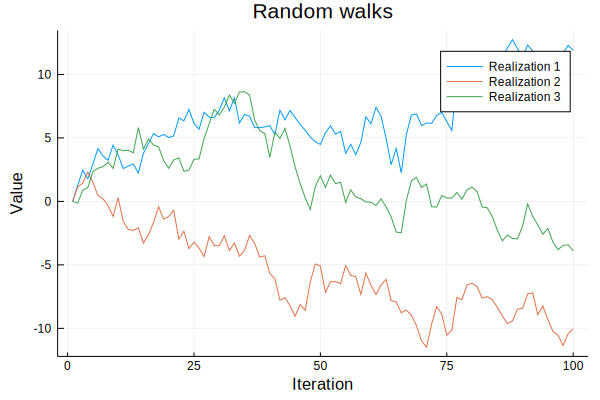

In [15]:
# Initialize an array of zeros and fill it using a for loop
N = 100 # length of one random walk
M = 3 # number of walks
x = zeros((N, M))
for i in 1:N-1
    r = randn(3) 
    x[i+1, :] = x[i, :] + r 
end
# Plotting using Plots
plot(x, xlabel="Iteration", ylabel = "Value", title = "Random walks", labels = ["Realization 1" "Realization 2" "Realization 3"])